# matplotlib学习笔记

## pyplot
pyplot是一个仿照MATLAB画图的接口设计的一个画图的库，接口的函数名称和使用规则都和MATLAB类似。

### 引入

In [2]:
import matplotlib.pyplot as plt

### 画线
`plt.plot(x,y,commond)`
x表示横坐标的取值，y表示纵坐标的取值，commond是可选的控制参数。如果只传递一个参数，例如plot(a), a被认为是纵坐标，横坐标为从0开始的自然数 0,1,2,3,...
还可以以两个或者三个参数为一组传递参数进入plot,这样可以一次画多条线段，`plot(x1,y1,x2,y2,x3,y3)`

>commond的取值：
b- : 蓝色直线
ro : 红色圆点
r-- : 红色虚线
bs : 蓝色实心方框
g^ : 绿色实心三角

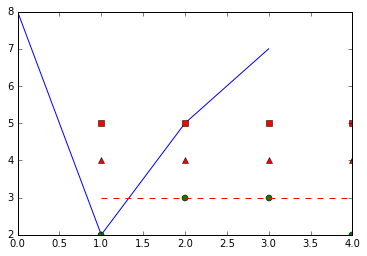

In [3]:
%matplotlib inline 
plt.plot([8,2,5,7]) 
plt.plot([1,2,3,4],[2,3,3,2],'go')
plt.plot([1,2,3,4],[3,3,3,3],'r--',[1,2,3,4],[4,4,4,4],'r^',[1,2,3,4],[5,5,5,5],'rs')
plt.show()

### 控制样式
1. 设置横坐标和纵坐标的取值范围：plt.axis([xmin.xmax,ymin,ymax])
2. 设置线宽：`plt.plot(x,y,linewidth = 2)`
   或者使用set方法：`line, = plot(x,y,'-')` `line.set_antialiased(False)`
   `plt.setp(lines, color='r', linewidth=2.0)`
   要查看所有可以设置的属性，可以使用`plt.setp(lines)`
   
3. 设置坐标标识：

```python
plt.xlable('x轴说明',fontsize=14,color='red')
plt.ylabel('y轴说明')
plt.title('图表标题')
plt.text('图表中说明性文字')
plt.grid(True) #是否显示网格线
```
每个设置都有更多的选项可以控制显示的各个方面，详细的属性信息参考[Text properties and layout](http://matplotlib.org/users/text_props.html#text-properties),关于图表上数学公式的书写，参考[Text rendering With LaTeX](http://matplotlib.org/users/usetex.html#usetex-tutorial)

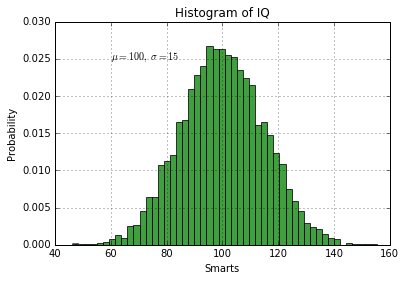

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 画散点图

### 同时画多个图
```python
plt.figure(1)  #创建图对象，括号里面的数字是这个图的标识
plt.subplot(211) # 创建子图，括号里的数字是numrows, numcols, fignum，这里这个子图所在的位置是第二行，第一列，在上面创建的那个figure1中。
plt.plot(x1,y1)

plt.subplot(221)
plt.plot(x2,y2)
```

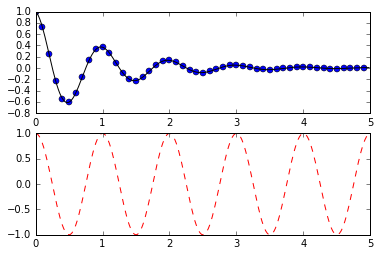

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(2)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### 图例


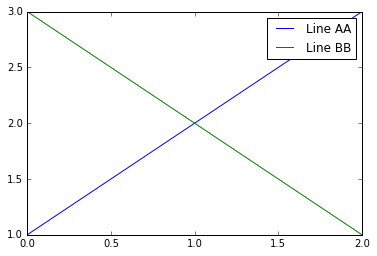

In [6]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend([line_up, line_down], ['Line AA', 'Line BB'])

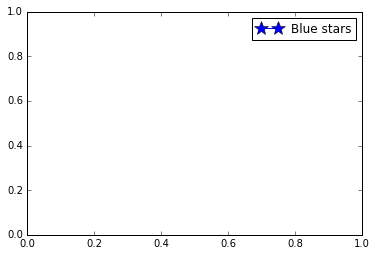

In [7]:
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

### 各种图

####  基本图表(plot)

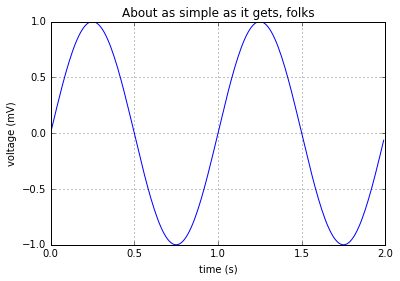

In [8]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.show()

#### 多个子图绘制在一起(subplot)

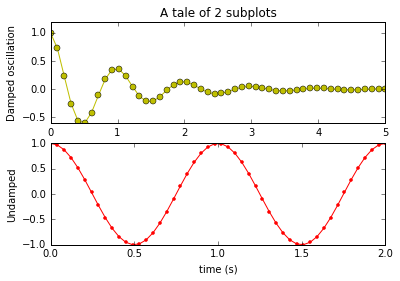

In [9]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

#### 直方图(hist)
- 下面这个程序展示了如何使用hist函数绘制直方图和如何绘制一条拟合直方图的曲线。
`n, bins, patches = hist(x,num_bins)`
x 构建直方图的数据，x = [n_samples,]
num_bins 要分成的组数，最后生成的直方图有num_bins个方框。
n 每个直方的值
bins 每个直方的起始位置
patches :Silent list of individual patches used to create the histogram or list of such list if multiple input datasets.

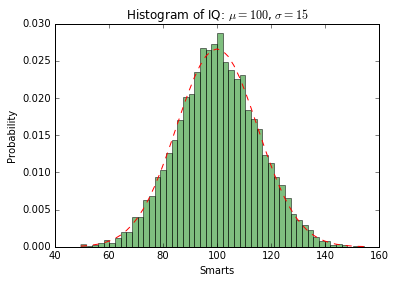

In [10]:
"""
Demo of the histogram (hist) function with a few features.

In addition to the basic histogram, this demo shows a few optional features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the integral of
      the histogram is 1. The resulting histogram is a probability density.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

"""
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()


#### 饼状图(pie)
 `plt.pie(size,explode,labels,colors)`
 size: 绘制图的数据
 explode: 分割出来显示的某个数据
 lables:文字说明
 colors: 饼状图对应部分的颜色

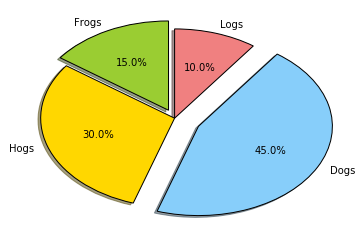

In [11]:
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)



plt.show()

#### 表格
```python
 plt.table(cellText=data,rowLabels=rows,colLabels=columns,loc='bottom',bbox=[0.25, -0.5, 0.5, 0.3])
```
cellText: 表格中的数据 [n_rows,n_colums]
rowLabels: 行标签
collabels: 列标签
loc: 相对于图表的位置，top,right,left,bottom
bbox: 边距

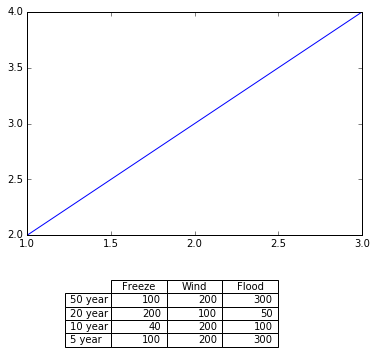

In [12]:
"""
Demo of table function to display a table within a plot.
"""
import matplotlib.pyplot as plt
import numpy as np

data = [[  100,  200,   300  ],
        [  200,  100,   50   ],
        [  40,   200,  100   ],
        [  100,   200,  300  ]]
y = np.array(data)
y = y.reshape(1,-1)
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (50, 20, 10, 5)]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom',
                      bbox=[0.25, -0.5, 0.5, 0.3])

plt.plot([1,2,3],[2,3,4])
plt.show()

####  极坐标下绘图
```
ax = plt.subplot(211, projection='polar')
ax.plot(theta, r, color='r', linewidth=3)
```
projection='polar' 指定是极坐标
theta： 横坐标
r: 纵坐标

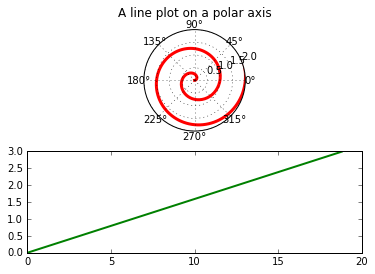

In [13]:
"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(211, projection='polar')
ax.plot(theta, r, color='r', linewidth=3)
ax.set_rmax(2.0)
ax.grid(True)
ax.set_title("A line plot on a polar axis", va='bottom')

ax2 = plt.subplot(212)
ax2.plot(theta,r,color='g',linewidth=2)
plt.show()


### 颜色（Colormaps）

### 动画（animation）
- `import matplotlib.animation as animation`
- `animation.FuncAnimation(fig1, update_line, num, fargs=(data, l), interval=200, blit=True,repeat=False)`
- `FuncAnimation`是根据自定义函数生成动画的一个接口，
- `fig1` 是画布，用`plt.figure()`生成
- `uodate_line` 是更新图像的函数，一般返回的是一个`2D`或者`3D`的`line`对象，`FuncAnimation`会自动循环调用该函数设置图像显示的line,以达到动画的效果。
- `num`是传入`update_line`的第一个参数，该参数会从0开始每次递增1，直到结束。
- `fargs`可以传入额外的参数，这里我的`update_line`有三个参数，第一个是`num`,第二个和第三个就是靠指定`fargs`参数传入进去的，通过fargs传递的参数不会自动递增。
- `interval` 指定调用`update_line`的间隔，就是动画间隔
- `repeat` 设置动画播放完后是否重复

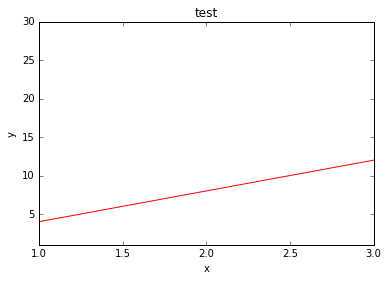

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    xxdata = data
    yydata = 4 * data + num
    line.set_xdata(xxdata)
    line.set_ydata(yydata)
    return line,

fig1 = plt.figure()
data = np.array([1,2,3])
l, = plt.plot([], [], 'r-')
plt.xlim(1,3)
plt.ylim(1,30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=200, blit=True,repeat=False)
plt.show()